In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

In [15]:
# Есть 2 номинативные переменные, и обе переменные имеют 2 градации
# Пол - Мужской - М/Женский - Ж; Профессия - Биологи - Б/Информатики - И
sex = np.array(["М" for _ in range(26)] + ["Ж" for _ in range(15)])
profession = np.array(
    ["Б" for _ in range(15)] + ["И" for _ in range(17)] + ["Б" for _ in range(9)]
)
number = np.array([i for i in range(len(sex))])

# Представим данные в виде таблицы, где увидим число биологов и информатиков
# среди юношей и девушек. Это будет таблица сопряженностей
df = pd.DataFrame({"sex": sex, "profession": profession, "number": number}) \
        .groupby(["sex", "profession"]).count() 

H0: Переменные пол и профессия не взаимосвязаны между собой.

Н1: Между переменными есть значимая взаимосвязь.

Для проверки гипотез расчитаем как бы была заполнена таблица (какие бы значения мы ожидали получить), если бы была верна
нулевая гипотеза.

У нас всего 41 человек, из них 26 юношей и 15 девушек. То есть у нас 26/41=63.4% юношей, и 15/41=36.6% девушек.

Соответственно:

36.6% биологов - это девушки 24(биолога) * 36.6% = 8.8,

36.6% информатиков - это девушки 17(информатиков) * 36.6% = 6.2,

63.4% биологов - мужчины 24 * 63.4 = 15.2

63.4% информатиков - это девушки 17 * 63.4 = 10.8

In [47]:
# добавим в нашу таблицу ожидаемые результаты
df["expected"] = np.array([8.8, 6.2, 15.2, 10.8])
# и расчитаем Хи квадрат
chi_sq = sum((df.number - df.expected) ** 2 / df.expected)

Так как нам известно количество биологов, информатиков, девушек и мужчик.
Зная только количество мужчин биологов, мы может узнать число женщи информатиков и тд, следовательно количество степеней свободы = 1.

Общая формула для степеней свободы будет выглядеть как:

(n - 1) * (m - 1),

где:

n - число градаций первого признака,

m - число градаций второго признака.

In [48]:
p_value = 1 - stats.chi2.cdf(chi_sq , 1)
if p_value >=0.05:
    print(p_value, "Значимых отличий не наблюдается, принимаем Н0")
else:
    print(p_value, "Обнаружены значимые отличия, отклоняем Н0")

0.8952592499878895 Значимых отличий не наблюдается, принимаем Н0


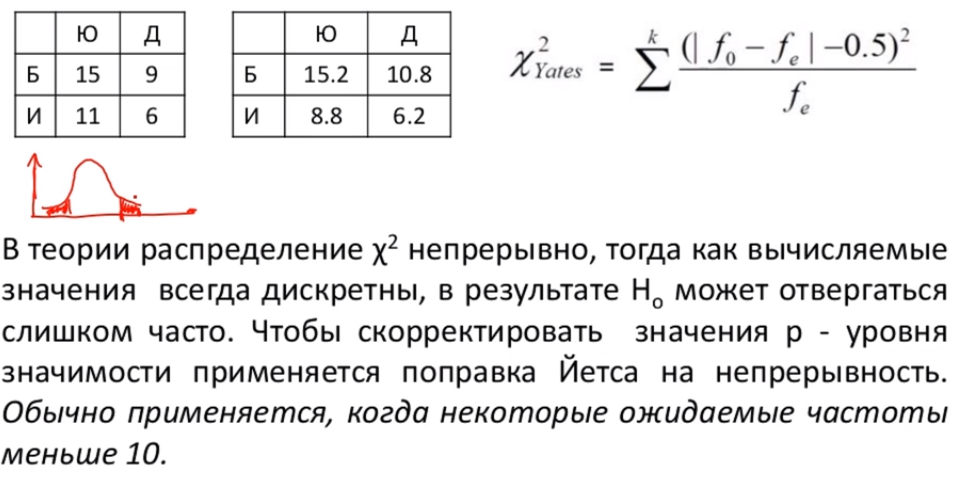
В основном это касается таблиц 2 на 2

In [51]:
# Расчитаем Хи квадрат с использованием поправки Йетса
chi_sq = sum((abs(df.number - df.expected) - 0.5) ** 2 / df.expected)
p_value = 1 - stats.chi2.cdf(chi_sq , 1)
if p_value >=0.05:
    print(p_value, "Значимых отличий не наблюдается, принимаем Н0")
else:
    print(p_value, "Обнаружены значимые отличия, отклоняем Н0")
chi_sq

0.8434530457035923 Значимых отличий не наблюдается, принимаем Н0


0.03899778772444318

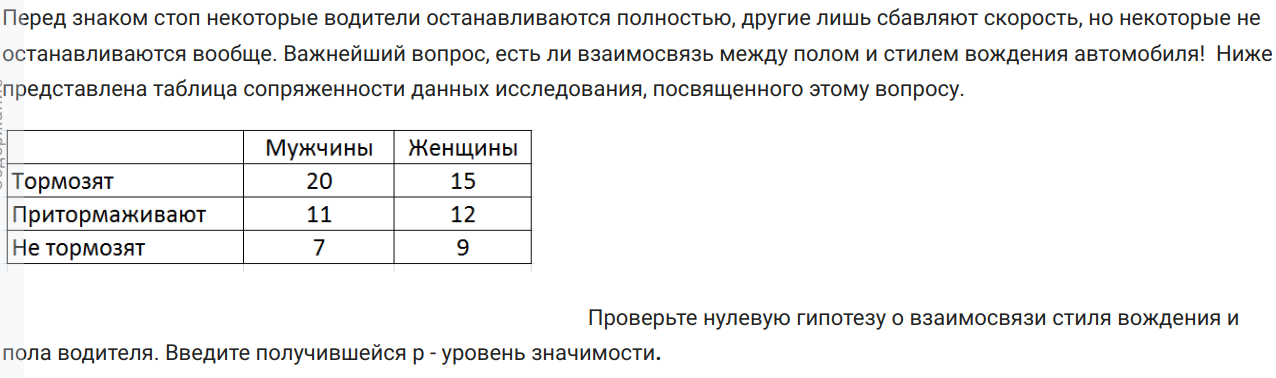

In [78]:
data = np.array([[20, 15],[11, 12],[7,  9]])
df = (len(data) - 1) * (len(data[0]) - 1)
total_people = sum([sum(i) for i in data])
male_percent = sum([i[0] for i in data]) / total_people
female_percent = 1 - male_percent
expected = np.array([[male_percent * sum(i), female_percent * sum(i)] for i in data])
chi_sq = sum(sum((data - expected) ** 2 / expected))
chi_sq

0.9544070774762996

In [80]:
p_value = 1 - stats.chi2.cdf(chi_sq , df)
print(p_value)

0.6205162173513055


[[2.02702703 2.02702703]
 [0.81081081 0.81081081]
 [1.21621622 1.21621622]]


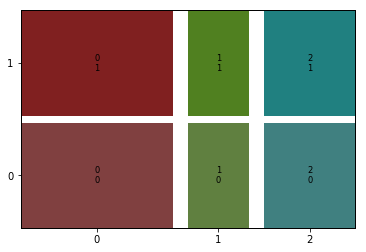

In [97]:
# А теперь посмотрим остатки по каждой из ячеек
residuals = abs(expected - data)
residuals
mosaic(residuals, gap=0.05, title='')
print(residuals)
plt.show()